In [1]:
from gradient_errors import Environment
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd

In [2]:
env = Environment('data_normal.xlsx')

D:\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [3]:
ro = env.nu * env.hPa * 100 / 8.31 / (env.T0 + 273)

In [4]:
Ns = []
sNs = []
k1s = []

for i in range(len(env.Q.Q)):
    U = getattr(env, f'e{i+1}').U
    I = getattr(env, f'e{i+1}').I
    T = getattr(env, f'e{i+1}').T
    
    
    Ns.append(U * I)
    sNs.append(env.get_error(Ns[-1]))
    k1s.append(env.chi2(Ns[-1], T, {'a': f'tr{i + 1}', 'b': f'k1{i + 1}'}, auto_reverse=False, mode='zero')[1])
    
    dict_df = {'$U$, В': list(map(str, U.detach().numpy())), 
           '$I$, A': list(map(str, I.detach().numpy())),
            '$N$, Вт': [str(round(_.item(), 3)) for _ in Ns[-1]],
          '$T$, \\textcelsius': [str(round(_.item(), 3)) for _ in T]}
    df = pd.DataFrame.from_dict(dict_df)
    print(df.style.to_latex())

0.0070228786371814445
\begin{tabular}{lllll}
 & $U$, В & $I$, A & $N$, Вт & $T$, \textcelsius \\
0 & 3.573 & 0.116 & 0.414 & 1.572 \\
1 & 4.957 & 0.16291999999999998 & 0.808 & 3.194 \\
2 & 5.965 & 0.19722 & 1.176 & 4.742 \\
3 & 6.349 & 0.21780000000000002 & 1.383 & 5.897 \\
\end{tabular}

0.0032129287927387964
\begin{tabular}{lllll}
 & $U$, В & $I$, A & $N$, Вт & $T$, \textcelsius \\
0 & 2.601 & 0.09040000000000001 & 0.235 & 1.327 \\
1 & 4.021 & 0.1397 & 0.562 & 3.17 \\
2 & 4.867 & 0.1692 & 0.823 & 4.816 \\
3 & 5.772 & 0.2005 & 1.157 & 6.855 \\
\end{tabular}

0.026179588033567056
\begin{tabular}{lllll}
 & $U$, В & $I$, A & $N$, Вт & $T$, \textcelsius \\
0 & 1.715 & 0.0599 & 0.103 & 1.106 \\
1 & 2.565 & 0.08940000000000001 & 0.229 & 2.26 \\
2 & 3.43 & 0.1194 & 0.41 & 3.956 \\
3 & 4.262 & 0.1484 & 0.632 & 6.486 \\
\end{tabular}



D:\mipt_edu\2sem\labs\2.1.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


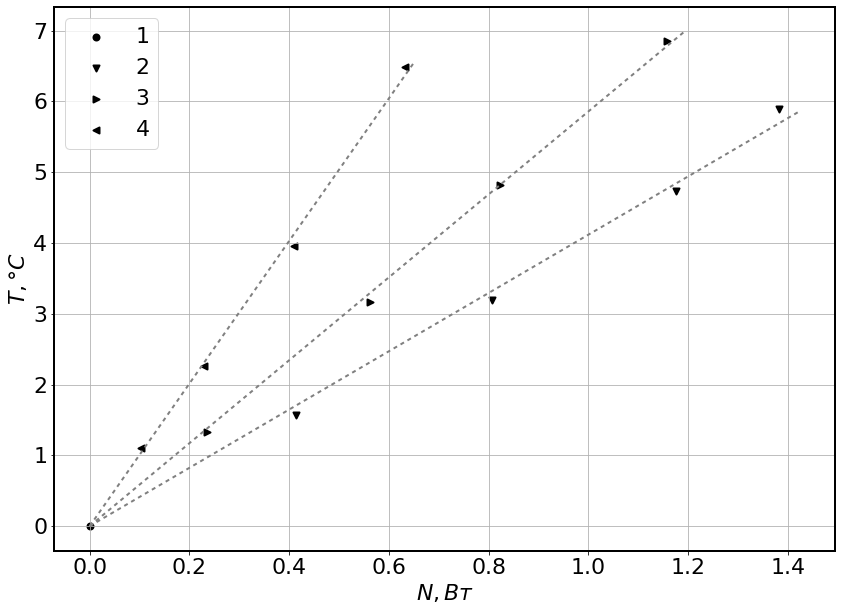

In [5]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

ax.scatter(x=0, y=0, linewidth=2, c='black', marker=markers[0], label=str(1))

for i in range(3):
    T = getattr(env, f'e{i+1}').T
    
    
    sT = env.get_error(T)
    T = T.detach().numpy()
    N, sN = Ns[i].detach().numpy(), sNs[i]

    ax.scatter(N, T, linewidth=2, c='black', marker=markers[i+1], label=str(i+2))

    X = np.array([min(N)*0, max(N)*1.03])
    Y = k1s[i].item()*X
    
    ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
#     ax.errorbar(N, T, xerr= sN, yerr=sT, fmt='none', linewidth=2)

    ax.set_ylabel(r"$T, °C$")
    ax.set_xlabel(r"$N, Вт$")

ax.legend()
fig.savefig(r'../images/TN.eps', format='eps')

In [6]:
ks = [1/_ for _ in k1s]
Qs = env.Q.Q * ro
sks, sQs = env.get_err_bars(ks, Qs)
env.chi2(Qs, ks, {'a': f'alpha', 'b': f'cp'}, auto_reverse=False)

D:\mipt_edu\2sem\labs\2.1.1\process\gradient_errors.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x).numpy(), torch.tensor(y).numpy()


3.499185493543821e-05


(tensor(0.0552, dtype=torch.float64, requires_grad=True),
 tensor(1050.5740, dtype=torch.float64, requires_grad=True))

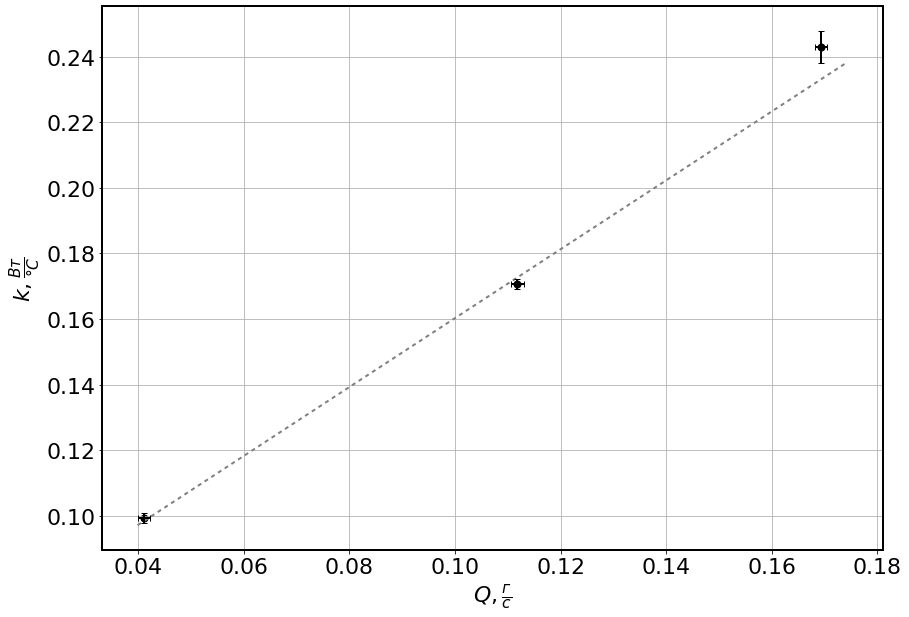

In [7]:
plt.rc('font', size=22)

markers = ['o', 'v', '>', '<', '^', 's', 'D']
# markers = ['1', '2', '3', '4', '+', 'x', '.']

fig, ax = plt.subplots(figsize=(14, 10))
ax.spines['bottom'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.grid()

k, Q = torch.tensor(ks).detach().numpy(), Qs.detach().numpy()

ax.scatter(Q*1000, k, linewidth=2, c='black')

X = np.array([min(Q*1000)*0.97, max(Q*1000)*1.03])
Y = env.alpha.item() + env.cp.item()/1000*X

ax.plot(X, Y, linewidth=2, c='gray', dashes=[0, 0, 2])
ax.errorbar(Q*1000, k, xerr = sQs*1000, yerr = sks, fmt='none', linewidth=2, c='black', capsize=3)

ax.set_ylabel(r"$k, \frac{Вт}{°C}$")
ax.set_xlabel(r"$Q, \frac{г}{c}$")
fig.savefig(r'../images/kQ.eps', format='eps')

In [8]:
env.show(ro, name='ro')

('1.1851', '0.0005', 0)

In [9]:
env.show(env.cp)

('1.05', '0.07', 3)

In [10]:
dict_df = {'$k$, $\\frac{\\textrm{Вт}}{\\textrm{°C}}$': [str(round(_.item(), 3)) for _ in ks], 
           '$Q$, $\\frac{\\textrm{г}}{\\textrm{с}}$': [str(round((_*1000).item(), 3)) for _ in Qs],
            '$\\sigma k$, $\\frac{\\textrm{Вт}}{\\textrm{°C}}$': [str(round(_.item(), 3)) for _ in sks],
          '$\\sigma Q$, $\\frac{\\textrm{г}}{\\textrm{с}}': [str(round((_*1000).item(), 3)) for _ in sQs]}
df = pd.DataFrame.from_dict(dict_df)
print(df.style.to_latex())

\begin{tabular}{lllll}
 & $k$, $\frac{\textrm{Вт}}{\textrm{°C}}$ & $Q$, $\frac{\textrm{г}}{\textrm{с}}$ & $\sigma k$, $\frac{\textrm{Вт}}{\textrm{°C}}$ & $\sigma Q$, $\frac{\textrm{г}}{\textrm{с}} \\
0 & 0.243 & 0.169 & 0.005 & 0.001 \\
1 & 0.171 & 0.112 & 0.002 & 0.001 \\
2 & 0.099 & 0.041 & 0.002 & 0.001 \\
\end{tabular}

